# Taiwan Credit Dataset: Logistic Regression

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
%cd drive/MyDrive/Github/ml-blog

/content/drive/MyDrive/Github/ml-blog


In [ ]:
!pip install xlrd==1.2.0
!pip install matplotlib==3.5.3

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xlrd

In [4]:
filename = 'default of credit card clients.xls'

In [5]:
DATA = os.path.relpath('/content/drive/MyDrive/Github/ml-blog/credit/data/' + filename)

In [6]:
df = pd.read_excel(DATA, 'Data', index_col=[0], header=[1], na_values='NA')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
X = df.iloc[:, :22]
y = df.iloc[:, 23]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
     ('logreg', LogisticRegression(tol=0.001, class_weight='auto', multi_class='ovr', random_state=42))]
)

In [13]:
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(class_weight='auto', multi_class='ovr',
                                    random_state=42, tol=0.001))])

In [14]:
lr_pipe.score(X_test, y_test)

0.8101666666666667

## ROC - AUC Analysis

* This is done because of the class imbalance. **F1 Score** as well as the **AUC** plot will be a more faithful representation of the model's ability.

In [15]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [16]:
y_probas = lr_pipe.predict_proba(X_test)[:, 1] # using the 'greater label', i.e., 0 for 'No default'.

In [17]:
y_test_np = y_test.to_numpy()

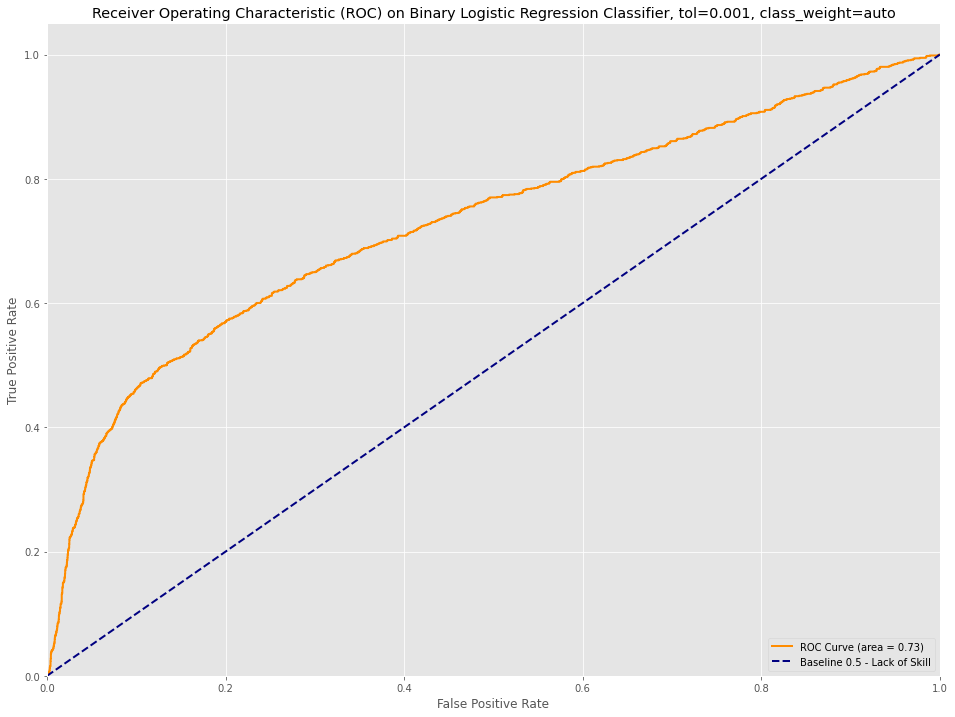

In [18]:
truePR = dict()
falsePR = dict()
roc_auc = dict()

falsePR, truePR, _ = roc_curve(y_test_np, y_probas)
roc_auc = auc(falsePR, truePR)

plt.style.use('ggplot')
plt.figure(figsize=(16,12))
lw = 2
plt.plot(
    falsePR,
    truePR,
    color='darkorange',
    lw=lw,
    label="ROC Curve (area = %0.2f)" % roc_auc,
)

plt.plot([0,1], color='navy', lw=lw, linestyle='--', label='Baseline 0.5 - Lack of Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) on Binary Logistic Regression Classifier, tol=0.001, class_weight=auto')
plt.legend(loc='lower right')
plt.savefig('./credit/EDA/logreg-roc-auc-plot.png')
plt.show()


In [19]:
y_pred_lr = lr_pipe.predict(X_test)

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



In [22]:
print('Percent of test set labeled 1: ', round((1313 / 6000)*100, 3))

Percent of test set labeled 1:  21.883
